# Definição das funções

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def funcion1(x,y1,y2): #f1
    return y2
    # return x*y1 + 2

def funcion2(x,y1,y2): #f2
    return -5*y2 -4*y1 + 2*x**2

# Euler Explicito e outros

In [ ]:
def sistema_euler(x,y1,h,x_final,escolha,y2=0):
  lista_x = []
  lista_y1 = []
  lista_f1 = []


  if escolha == 1:
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        f = funcion1(x, y1,y2)
        print(f"f = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")


        lista_f1.append(f)
        print(f"y1 = {round(y1,4)} + {h}*{round(f,4)} = {round(y1 + h*f,4)}")
        print()
        t = y1 + h*f
        x += h
        y1 = t


    # Criando um DataFrame com os dados
    dados = {"x": lista_x, "y": lista_y1, "f": lista_f1}
    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler")
    plt.plot(lista_x, lista_y1, 'bo-', label='Aproximação de Euler')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler explicito")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()



  if escolha == 2:
    lista_y2 = []
    lista_f2 = []

    while x <= x_final:
        print("--------------------------------------------------------")
        f1 = funcion1(x,y1,y2)
        lista_f1.append(f1)

        print(f"f1 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f}")


        f2 = funcion2(x,y1,y2)
        print(f"f2 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")
        print()

        lista_f2.append(f2)
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)

        print(f"y1 = {round(y1,4)} + {h}*{round(f1,4)} = {round(y1 + h*f1,4)}")

        print(f"y2 = {round(y2,4)} + {h}*{round(f2,4)} = {round(y2 + h*f2,4)}")
        print()
        t1 = y1 + h*f1
        t2 = y2 + h*f2
        x += h
        y1 = t1
        y2 = t2
    dados = {"x": lista_x, "y1": lista_y1, "y2": lista_y2, "f1": lista_f1, "f2": lista_f2}
    df = pd.DataFrame(dados)


    plt.figure("Gráfico usando o método de Euler explicito")
    plt.plot(lista_x, lista_y1, 'b-', label='Aproximação de Euler para y1')
    plt.plot(lista_x, lista_y2, 'r-', label='Aproximação de Euler para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()

## Euler modificado (Implementei para ajudar nos estudos, mas pode ignorar)

In [ ]:
def euler_modificado(x,y1,h,x_final,escolha,y2 = 0):
  lista_x = []
  lista_y1 = []
  lista_k11 = []
  lista_k21 = []
  if escolha == 1:
     while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")

        lista_k11.append(k11)

        k21 = funcion1(x + h/2, y1 + h*k11/2, y2)
        print(f"k21 = f1({round(x + h/2,4), round(y1 + h*k11/2,4)} = {funcion1(x + h/2, y1 + h*k11/2, y2):.4f}")
        lista_k21.append(k21)

        print()
        print(f"y1 = {round(y1,4)} + {h}*{round(k21,4)} = {round(y1 + h*k21,4)}")
        print()
        y1 = y1 + h*k21
        x += h
     dados = {"x": lista_x, "k1": lista_k11, "k2": lista_k21, "y1": lista_y1}
     df = pd.DataFrame(dados)


     plt.figure("Gráfico - Método de Euler modificado")  # Nome da janela
     plt.plot(lista_x, lista_y1, 'b-', label='Euler modificado para y1')
     plt.xlabel("Eixo X")
     plt.ylabel("Eixo Y")
     plt.title("Gráfico usando o método de Euler")
     plt.legend()
     plt.grid()
     display(df)
     plt.show()  # Mantém a execução aberta para exibir a tabela depois

  elif escolha == 2:
    lista_k12 = []
    lista_y2 = []
    lista_k22 = []
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)


        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4),round(y2,4)}) =  {funcion1(x,y1,y2):.4f}")

        k12 = funcion2(x,y1,y2)
        print(f"k12 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")

        lista_k11.append(k11)
        lista_k12.append(k12)

        k21 = funcion1(x + h/2, y1 + h*k11/2, y2 + h*k12/2)
        print(f"k21 = f1({round(x + h/2,4), round(y1 + h*k11/2,4), round(y2 + h*k12/2,4)} = {funcion1(x + h/2, y1 + h*k11/2, y2 + h*k12/2):.4f}")

        k22 = funcion2(x + h/2, y1 + h*k11/2, y2 + h*k12/2)
        print(f"k22 = f2({round(x + h/2,4), round(y1 + h*k11/2,4), round(y2 + h*k12/2,4)} ={funcion2(x + h/2, y1 + h*k11/2, y2 + h*k12/2):.4f}")

        lista_k21.append(k21)
        lista_k22.append(k22)
        print()
        print(f"y1 = {round(y1,4)} + {h}*{round(k21,4)} = {round(y1 + h*k21,4)}")
        y1 = y1 + h*k21
        print(f"y2 = {round(y2,4)} + {h}*{round(k22,4)} = {round(y2 + h*k22,4)}")
        print()
        y2 = y2 + h*k22
        x += h
    dados = {"x": lista_x, "k11": lista_k11, "k21": lista_k21, "k12" :lista_k12 , "k22" : lista_k22, "y1": lista_y1, "y2": lista_y2}




    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler modificado")  # Nome da janela
    plt.plot(lista_x, lista_y1, 'b-', label='Euler modificado para y1')



    plt.plot(lista_x, lista_y2, 'r-', label='Euler modificado para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()  # Mantém a execução aberta para exibir a tabela depois

## Euler melhorado (Implementei para ajudar nos estudos, mas pode ignorar)

In [ ]:
def euler_melhorado(x,y1,h,x_final,escolha,y2 = 0):
  # print("i ||  x    ||   y1    ||   y2    ||   f1    ||   f2    ||")
  lista_x = []
  lista_y1 = []
  lista_k11 = []
  lista_k21 = []
  if escolha == 1:
     while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f}")

        lista_k11.append(k11)

        k21 = funcion1(x + h, y1 + h*k11, y2)
        print(f"k21 = f1({round(x + h,4), round(y1 + h*k11,4)} = {funcion1(x + h, y1 + h*k11,y2)}")


        lista_k21.append(k21)
        print()
        print(f"y1 = {round(y1,4)} + {h}/2 *{round(k21,4)} = {round(y1 + h*k21,4)}")
        y1 = y1 + h/2*(k21+k11)
        print()

        x += h
     dados = {"x": lista_x, "y1": lista_y1, "k1": lista_k11, "k2": lista_k21}
     df = pd.DataFrame(dados)


     plt.figure("Gráfico - Método de Euler melhorado")  # Nome da janela
     plt.plot(lista_x, lista_y1, 'b-', label='Euler melhorado para y1')
     plt.xlabel("Eixo X")
     plt.ylabel("Eixo Y")
     plt.title("Gráfico usando o método de Euler")
     plt.legend()
     plt.grid()
     display(df)
     plt.show()  # Mantém a execução aberta para exibir a tabela depois

  elif escolha == 2:
    lista_k12 = []
    lista_y2 = []
    lista_k22 = []
    while x <= x_final:
        print("--------------------------------------------------------")
        lista_x.append(x)
        lista_y1.append(y1)
        lista_y2.append(y2)

        k11 = funcion1(x,y1,y2)
        print(f"k11 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f} ")

        k12 = funcion2(x,y1,y2)
        print(f"k12 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")

        lista_k11.append(k11)
        lista_k12.append(k12)

        k21 = funcion1(x + h, y1 + h*k11, y2 + h*k12)
        print(f"k21 = f1({round(x + h,4), round(y1 + h*k11,4), round(y2 + h*k12,4)} = {funcion1(x + h, y1 + h*k11, y2 + h*k12):.4f}")


        k22 = funcion2(x + h, y1 + h*k11, y2 + h*k12)
        print(f"k22 = f2({round(x + h,4), round(y1 + h*k11,4), round(y2 + h*k12,4)} = {funcion2(x + h, y1 + h*k11, y2 + h*k12):.4f}")


        lista_k21.append(k21)
        lista_k22.append(k22)
        print()
        print(f"y1 = {round(y1,4)} + {h}/2 *{round(k21,4)} = {round(y1 + h/2*(k21+k11),4)}")
        y1 = y1 + h/2*(k21+k11)

        print(f"y2 = {round(y2,4)} + {h}/2 *{round(k22,4)} = {round(y2 + h/2*(k22+k12),4)}")
        print()
        y2 = y2 + h/2*(k22 + k12)

        x += h
    dados = {"x": lista_x, "k11": lista_k11, "k21": lista_k21, "k12" :lista_k12 , "k22" : lista_k22, "y1": lista_y1, "y2": lista_y2}




    df = pd.DataFrame(dados)


    plt.figure("Gráfico - Método de Euler melhorado")  # Nome da janela
    plt.plot(lista_x, lista_y1, 'b-', label='Euler melhorado para y1')
    plt.plot(lista_x, lista_y2, 'r-', label='Euler melhorado para y2')
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Gráfico usando o método de Euler")
    plt.legend()
    plt.grid()
    display(df)
    plt.show()  # Mantém a execução aberta para exibir a tabela depois

#Runge Kutta 4 ordem

In [ ]:
class RungeKutta4():
  def __init__(self, x, y1, h, x_final, escolha, y2=0, ABM = False):
      self.x = x
      self.y1 = y1
      self.h = h
      self.x_final = x_final
      self.escolha = escolha
      self.y2 = y2
      self.lista_x = None
      self.lista_y1 = None
      self.lista_y2 = None
      self.lista_f1 = None
      self.lista_f2 = None
      self.ABM = ABM




  def sistema_runge_kutta_4(self,x, y1, h, x_final, escolha, y2 = 0):
      lista_x = []
      lista_y1 = []
      lista_k11 = []
      lista_k21 = []
      lista_k31 = []
      lista_k41 = []
      lista_f1 = []




      if escolha == 1:

        while x <= x_final:
            print("--------------------------------------------------------")
            lista_x.append(x)
            lista_y1.append(y1)
            lista_f1.append(funcion1(x,y1,y2))

            k1 = funcion1(x, y1,y2)
            lista_k11.append(k1)
            print(f"k1 = f1({x,round(y1,4)}) = {funcion1(x,y1,y2):.4f} ")

            k2 = funcion1(x + h/2, y1 + k1/2*h,y2)
            print(f"k2 = f1({round(x + h/2,4), round(y1 + k1/2*h,4)}) = {funcion1(x + h/2, y1,y2):.4f}")
            lista_k21.append(k2)

            k3 = funcion1(x + h/2, y1 + k2/2*h,y2)
            print(f"k3 = f1({round(x + h/2,4), round(y1 + k2/2*h,4)}) = {funcion1(x + h/2, y1,y2):.4f}")
            lista_k31.append(k3)

            k4 = funcion1(x + h, y1 + k3*h,y2)
            print(f"k4 = f1({round(x + h,4), round(y1 + k3*h,4)}) = {funcion1(x + h, y1,y2):.4f}")
            lista_k41.append(k4)
            print()
            print(f"y1 = {round(y1,4)} + {h}/6 *({round(k1,4)} + 2*{round(k2,4)} + 2*{round(k3,4)} + {round(k4,4)}) = {round(y1 + (h/6) * (k1 + 2*k2 + 2*k3 + k4),4)}")


            y1 = y1 + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

            print()
            x += h

        self.lista_f1 = lista_f1
        self.lista_y1 = lista_y1
        self.lista_x = lista_x



        if(not self.ABM):
          dados = {"x": lista_x,"k11": lista_k11, "k21": lista_k21, "k31" : lista_k31,  "k41" : lista_k41,  "y1": lista_y1}
          df = pd.DataFrame(dados)

          plt.figure("Gráfico - Método de Runge-Kutta de 4ª ordem")
          plt.plot(lista_x, lista_y1, 'bo-', label='Aproximação de RK4')
          plt.xlabel("Eixo X")
          plt.ylabel("Eixo Y")
          plt.title("Gráfico usando o método de Runge-Kutta de 4ª ordem")
          plt.legend()
          plt.grid()
          display(df)
          plt.show()

      elif escolha == 2:
        lista_y2 = []
        lista_k12 = []
        lista_k22 = []
        lista_k32 = []
        lista_k42 = []
        lista_f2 = []


        while x <= x_final:
            print("--------------------------------------------------------")

            lista_x.append(x)
            lista_y1.append(y1)
            lista_y2.append(y2)
            lista_f1.append(funcion1(x,y1,y2))
            lista_f2.append(funcion2(x,y1,y2))


            k1_y1 =  funcion1(x, y1, y2)
            k1_y2 =  funcion2(x, y1, y2)
            print(f"k1_y1 = f1({x,round(y1,4),round(y2,4)}) = {funcion1(x,y1,y2):.4f} ")
            print(f"k1_y2 = f2({x,round(y1,4),round(y2,4)}) = {funcion2(x,y1,y2):.4f}")


            lista_k11.append(k1_y1)
            lista_k12.append(k1_y2)

            k2_y1 =  funcion1(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2)
            k2_y2 =  funcion2(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2)
            print(f"k2_y1 = f1({round(x + h/2,4), round(y1 + h*k1_y1/2,4), round(y2 + h*k1_y2/2,4)}) = {funcion1(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2):.4f} ")
            print(f"k2_y2 = f2({round(x + h/2,4), round(y1 + h*k1_y1/2,4), round(y2 + h*k1_y2/2,4)}) = {funcion2(x + h/2, y1 + h*k1_y1/2, y2 + h*k1_y2/2):.4f}")

            lista_k21.append(k2_y1)
            lista_k22.append(k2_y2)



            k3_y1 =  funcion1(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2)
            k3_y2 =  funcion2(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2)
            lista_k31.append(k3_y1)
            lista_k32.append(k3_y2)

            print(f"k3_y1 = f1({round(x + h/2,4), round(y1 + h*k2_y1/2,4), round(y2 + h*k2_y2/2,4)}) = {funcion1(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2):.4f}")
            print(f"k3_y2 = f2({round(x + h/2,4), round(y1 + h*k2_y1/2,4), round(y2 + h*k2_y2/2,4)}) = {funcion2(x + h/2, y1 + h*k2_y1/2, y2 + h*k2_y2/2):.4f}")


            k4_y1 =  funcion1(x + h, y1 + h*k3_y1, y2 + h*k3_y2)
            k4_y2 =  funcion2(x + h, y1 + h*k3_y1, y2 + h*k3_y2)

            print(f"k4_y1 = f1({round(x + h,4), round(y1 + h*k3_y1,4), round(y2 + h*k3_y2,4)}) = {funcion1(x + h, y1 + h*k3_y1, y2 + h*k3_y2):.4f}")
            print(f"k4_y2 = f2({round(x + h,4), round(y1 + h*k3_y1,4), round(y2 + h*k3_y2,4)}) = {funcion2(x + h, y1 + h*k3_y1, y2 + h*k3_y2):.4f}")
            print()
            lista_k41.append(k4_y1)
            lista_k42.append(k4_y2)



            print(f" y1 = {round(y1,4)} + {h}/6 * ({round(k1_y1,4)} + 2*{round(k2_y1,4)} + 2*{round(k3_y1,4)} + {round(k4_y1,4) }) = {round(y1 + (h/6) * (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1),4)}")
            y1 = y1 + (h/6) * (k1_y1 + 2*k2_y1 + 2*k3_y1 + k4_y1)

            print( f" y2 = {round(y2,4)} + {h}/6 * ({round(k1_y2,4)} + 2*{round(k2_y2,4)} + 2*{round(k3_y2,4)} + {round(k4_y2,4)}) = {round(y2 + (h/6) * (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2),4)}")
            y2 = y2 + (h/6) * (k1_y2 + 2*k2_y2 + 2*k3_y2 + k4_y2)
            print()
            x += h




        self.lista_y1 = lista_y1
        self.lista_y2 = lista_y2
        self.lista_f1 = lista_f1
        self.lista_f2 = lista_f2
        self.lista_x = lista_x

        if(not self.ABM):
          dados = {"x": lista_x,"k11": lista_k11, "k21": lista_k21, "k31" : lista_k31,  "k41" : lista_k41, "k12": lista_k12, "k22": lista_k22, "k32" : lista_k32,  "k42" : lista_k42,  "y1": lista_y1, "y2": lista_y2}

          df = pd.DataFrame(dados)

          plt.figure("Gráfico - Método de Runge-Kutta de 4ª ordem")
          plt.plot(lista_x, lista_y1, 'b-', label='Aproximação RK4 para y1')
          plt.plot(lista_x, lista_y2, 'r-', label='Aproximação RK4 para y2')
          plt.xlabel("Eixo X")
          plt.ylabel("Eixo Y")
          plt.title("Gráfico usando o método de Runge-Kutta de 4ª ordem")
          plt.legend()
          plt.grid()
          display(df)
          plt.show()

  def get_lista_x(self):
    return self.lista_x

  def get_lista_y1(self):
    return self.lista_y1

  def get_lista_y2(self):
    return self.lista_y2
  def get_lista_f1(self):
    return self.lista_f1

  def get_lista_f2(self):
    return self.lista_f2

# Metodo Adams-Bashforth-Moulton

In [ ]:
from re import I
def Adams_Bashforth_Moulton(x, y1, h, x_final, escolha, y2=0):
    rk4 = RungeKutta4(x, y1, h, x_final, escolha, y2,True)
    rk4.sistema_runge_kutta_4(x, y1, h, x + h, escolha, y2)

    lista_y1 = rk4.get_lista_y1()[:2]
    lista_f1 = rk4.get_lista_f1()[:2]
    lista_x = rk4.get_lista_x()[:2]
    x = lista_x[-1] + h
    i = 2

    if escolha == 1:
      while x <= x_final:
          lista_x.append(x)
          print("\n------------------------------------- Começo ---------------------------------------\n")
          # Passo do método preditor (Adams-Bashforth de 2ª ordem)
          f_i, f_i_1 = lista_f1[-1], lista_f1[-2]
          y_1_i = lista_y1[-1] + (h/2) * (3*f_i - f_i_1)
          print(f"--> y_{i} = {round(y1,3)} + {h}/2 * (3*{round(f_i,3)} - {round(f_i_1,3)}) = {round(y_1_i,3)}")

          print("\n-------------------------------------Ciclo---------------------------------------\n")

          # Cálculo da correção usando Adams-Moulton de 2ª ordem

          while(True):
            f_1_i = funcion1(x , y_1_i, y2 )
            print(f"f_{i} = f1({x,round(y_1_i,3)}) = {round(funcion1(x,y_1_i,y2),3)}")


            y_temp_1_i = lista_y1[-1] + (h/12) * (5*f_1_i + 8*(f_i) - f_i_1)
            print(f"y_{i} = {round(lista_y1[-1],3)} + {h}/12 * (5*{round(f_1_i,3)} + 8*({round(f_i,3)}) - {round(f_i_1,3)} = {round(y_temp_1_i,4)}")

            if(abs(y_temp_1_i - y_1_i) < 0.001):
              print(f"|y{i}_atual - y{i}_anterior| = {round(abs(y_temp_1_i - y_1_i),3)}\n\n")
              break
            else:
              print(f"|y{i}_atual - y{i}_anterior| = {round(abs(y_temp_1_i - y_1_i),3)}\n\n")
              y_1_i = y_temp_1_i

          lista_y1.append(y_temp_1_i)
          lista_f1.append(funcion1(x, y_temp_1_i,y2))

          # Atualizando os valores
          i +=1
          x += h
          x = round(x,2)

      # Criando DataFrame para análise

      df = pd.DataFrame({'x': lista_x, 'y': lista_y1, 'f': lista_f1})
      display(df)
      # Plotando os resultados
      plt.figure(figsize=(8,5))
      plt.plot(lista_x, lista_y1, 'bo-', label='Adams-Bashforth-Moulton')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.title('Método Adams-Bashforth-Moulton (Passo 2)')
      plt.legend()
      plt.grid()
      plt.show()

    if escolha == 2:
      lista_y2 = rk4.get_lista_y2()[:2]
      lista_f2 = rk4.get_lista_f2()[:2]


      while x <= x_final:
          lista_x.append(x)

          # Passo do método preditor (Adams-Bashforth de 2ª ordem)
          f1_i, f1_i_1 = lista_f1[-1], lista_f1[-2]
          y1_1_i = lista_y1[-1] + (h/2) * (3*f1_i - f1_i_1)

          f2_i, f2_i_1 = lista_f2[-1], lista_f2[-2]
          y2_1_i = lista_y2[-1] + (h/2) * (3*f2_i - f2_i_1)
          print("\n------------------------------------- Começo ---------------------------------------\n")
          print(f"--> y_1{i} = {round(y1,3)} + {h}/2 * (3*{round(f1_i,3)} - {round(f1_i_1,3)}) = {round(y1_1_i,3)}")
          print(f"--> y_2{i} = {round(y2,3)} + {h}/2 * (3*{round(f2_i,3)} - {round(f2_i_1,3)}) = {round(y2_1_i,3)}")

          print("\n-------------------------------------Ciclo---------------------------------------\n")

          # Cálculo da correção usando Adams-Moulton de 2ª ordem
          while(True):
            f1_1_i = funcion1(x , y1_1_i,y2_1_i )
            y1_temp_1_i = lista_y1[-1] + (h/12) * (5*f1_1_i + 8*f1_i - f1_i_1)
            print(f"f_1{i} = f1({x,round(y1_1_i,3)}) = {round(funcion1(x,y1_1_i,y2_1_i),3)}")
            print(f"y_1{i} = {round(lista_y1[-1],3)} + {h}/12 * (5*{round(f1_1_i,3)} + 8*({round(f1_i,3)}) - {round(f1_i_1,3)} = {round(y1_temp_1_i,4)}")

            f2_1_i = funcion2(x , y1_1_i, y2_1_i )
            y2_temp_1_i = lista_y2[-1] + (h/12) * (5*f2_1_i + 8*f2_i - f2_i_1)

            print(f"f_{i} = f1({x,round(y2_1_i,3)}) = {round(funcion2(x,y1_1_i,y2_1_i),3)}")
            print(f"y_{i} = {round(lista_y2[-1],3)} + {h}/12 * (5*{round(f2_1_i,3)} + 8*({round(f2_i,3)}) - {round(f2_i_1,3)} = {round(y2_temp_1_i,4)}")

            if(abs(y1_temp_1_i - y1_1_i) < 0.001 and abs(y2_temp_1_i - y2_1_i) <0.001 ):
              print(f"|y1{i}_atual - y1{i}_anterior| = {round(abs(y1_temp_1_i - y1_1_i),3)}\n\n")
              print(f"|y2{i}_atual - y2{i}_anterior| = {round(abs(y2_temp_1_i - y2_1_i),3)}\n\n")
              break
            else:
              print(f"|y1{i}_atual - y1{i}_anterior| = {round(abs(y1_temp_1_i - y1_1_i),3)}\n\n")
              print(f"|y2{i}_atual - y2{i}_anterior| = {round(abs(y2_temp_1_i - y2_1_i),3)}\n\n")
              y1_1_i = y1_temp_1_i
              y2_1_i = y2_temp_1_i

          # Atualizando os valores
          x += h
          x = round(x,2)
          lista_y1.append(y1_temp_1_i)
          lista_f1.append(funcion1(x, y1_temp_1_i,y2_temp_1_i))
          lista_y2.append(y2_temp_1_i)
          lista_f2.append(funcion2(x, y1_temp_1_i,y2_temp_1_i))

      # Criando DataFrame para análise
      df = pd.DataFrame({'x': lista_x, 'y1': lista_y1, 'f1':lista_f1, 'y2': lista_y2,'f2':lista_f2})
      display(df)

      # Plotando os resultados
      plt.figure(figsize=(8,5))
      plt.plot(lista_x, lista_y1, 'bo-', label='y1')
      plt.plot(lista_x, lista_y2, 'ro-', label='y2')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.title('Método Adams-Bashforth-Moulton (Passo 2)')
      plt.legend()
      plt.grid()
      plt.show()

# Menu inicial


## Menu PVI

In [ ]:
def menu_PVI(x, y1, h, x_final, escolha, y2):

    print("Escolha o método:\n 1 - Euler explicito \n 2 - Runge-Kutta de 4ª ordem \n 3 - O Euler explicito e o Runge-Kutta \n 4 - Euler modificado \n 5 - Euler melhorado \n 6 - Todos os metodos")
    metodo = int(input("Escolha: "))

    if metodo == 1:
            print("Metodo Euler explicito")
            sistema_euler(x, y1,h, x_final,escolha,y2)
    elif metodo == 2:
            print("Metodo Runge-Kutta")
            Kutta = RungeKutta4(x, y1, h, x_final,escolha,y2)
            Kutta.sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)


    elif metodo == 3:
            print("Metodo Euler explicito")
            sistema_euler(x, y1, h, x_final,escolha,y2)
            Kutta = RungeKutta4(x, y1, h, x_final,escolha,y2)
            Kutta.sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)

    elif metodo == 4:
            print("Metodo Euler modificado")
            euler_modificado(x, y1, h, x_final, escolha,y2)

    elif metodo == 5:
            print("Metodo Euler melhorado")
            euler_melhorado(x, y1, h, x_final, escolha,y2)
    elif metodo == 6:
      print("\n Euler Explicito: \n")
      sistema_euler(x, y1,h, x_final,escolha,y2)
      print("\n Runge-Kutta: \n")
      Kutta = RungeKutta4(x, y1, h, x_final,escolha,y2)
      Kutta.sistema_runge_kutta_4(x, y1, h, x_final,escolha,y2)
      print("\n Euler modificado: \n")
      euler_modificado(x, y1, h, x_final, escolha,y2)
      print("\n Euler melhorado: \n")
      euler_melhorado(x, y1, h, x_final, escolha,y2)
    else:
        print("Nenhum correspondente")



## Menu Geral

Escolha se irá usar dos metodos: 
 1 - (Euler/Melhorado/Modificado/Rk4) 
 2- Metodo Adams-Bashforth-Moulton 
Escolha: 2
Quantas funções você irá usar?
 1 - Uma função 
 2 - Duas funções
Escolha: 2
Digite o valor do x inicial: 0
Digite o valor do x final: 0.4
Digite o valor de h: 0.2
Digite o valor de y1(0.0): 0
Digite o valor de y2(0.0): 1
--------------------------------------------------------
k1_y1 = f1((0.0, 0.0, 1.0)) = 1.0000 
k1_y2 = f2((0.0, 0.0, 1.0)) = -5.0000
k2_y1 = f1((0.1, 0.1, 0.5)) = 0.5000 
k2_y2 = f2((0.1, 0.1, 0.5)) = -2.8800
k3_y1 = f1((0.1, 0.05, 0.712)) = 0.7120
k3_y2 = f2((0.1, 0.05, 0.712)) = -3.7400
k4_y1 = f1((0.2, 0.1424, 0.252)) = 0.2520
k4_y2 = f2((0.2, 0.1424, 0.252)) = -1.7496

 y1 = 0.0 + 0.2/6 * (1.0 + 2*0.5 + 2*0.712 + 0.252) = 0.1225
 y2 = 1.0 + 0.2/6 * (-5.0 + 2*-2.88 + 2*-3.74 + -1.7496) = 0.3337

--------------------------------------------------------
k1_y1 = f1((0.2, 0.1225, 0.3337)) = 0.3337 
k1_y2 = f2((0.2, 0.1225, 0.3337)) = -2.0785
k2_y1 = f

,x,y1,f1,y2,f2
0,0.0,0.000000,1.000000,1.000000,-5.000000
1,0.2,0.122533,0.333680,0.333680,-2.078533
2,0.4,0.157031,0.080775,0.080775,-0.311995


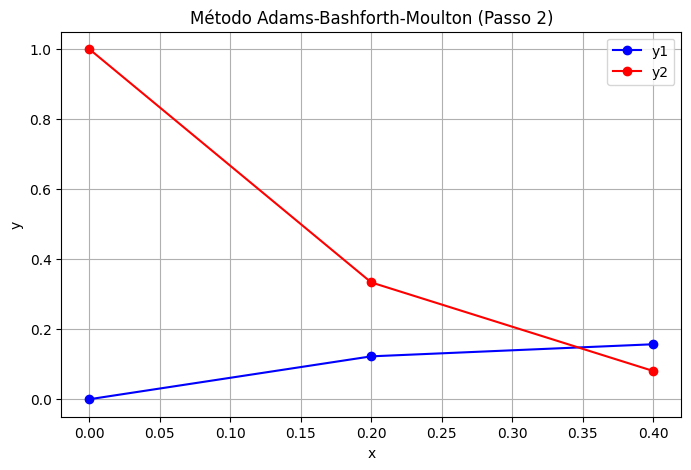

In [ ]:
print("Escolha se irá usar dos metodos: \n 1 - (Euler/Melhorado/Modificado/Rk4) \n 2- Metodo Adams-Bashforth-Moulton ")
metodo = int(input("Escolha: "))

print("Quantas funções você irá usar?\n 1 - Uma função \n 2 - Duas funções")
escolha = int(input("Escolha: "))

x = float(input("Digite o valor do x inicial: "))
x_final = float(input("Digite o valor do x final: "))

if(x_final < x):
    print("O valor de x final deve ser maior que o valor de x inicial")
    exit()

h = float(input("Digite o valor de h: "))

if escolha == 1:
    y1 = float(input(f"Digite o valor de y1({x}): "))
    y2 = 0
elif escolha == 2:
    y1 = float(input(f"Digite o valor de y1({x}): "))
    y2 = float(input(f"Digite o valor de y2({x}): "))

if metodo == 1:
    menu_PVI(x, y1, h, x_final, escolha, y2)
elif metodo == 2:
    Adams_Bashforth_Moulton(x, y1, h, x_final, escolha, y2)
else:
    print("Nenhum correspondente")

#MDF

## Algoritmo de thomas

In [ ]:

import numpy as np

def thomas_matriz_completa(A, d):
    n = len(d)
    x = np.zeros(n)

    # Extrai as diagonais da matriz A
    a = np.zeros(n)  # Subdiagonal (a[0] não é usado)
    b = np.zeros(n)  # Diagonal principal
    c = np.zeros(n)  # Superdiagonal (c[-1] não é usado)

    for i in range(n):
        b[i] = A[i][i]
        if i > 0:
            a[i] = A[i][i-1]
        if i < n-1:
            c[i] = A[i][i+1]

    # Fase de Eliminação (transforma A em triangular superior)
    for i in range(1, n):
        m = a[i] / b[i-1]
        b[i] -= m * c[i-1]
        d[i] -= m * d[i-1]

    # Substituição Regressiva
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]

    return x

## Dirichlet

[-3.875  2.5    0.   ]   =   -2.96875
[ 1.5   -3.875  2.5  ]   =   0.0625
[ 0.     1.5   -3.875]   =   0.09375


,x,y
0,0.00,2.000000
1,0.25,1.107488
2,0.50,0.529106
3,0.75,0.180622
4,1.00,0.000000


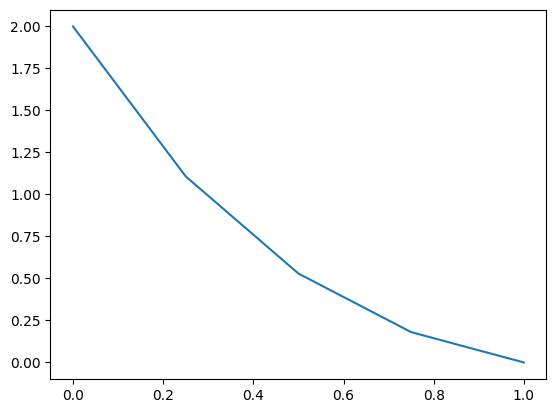

In [ ]:
import numpy as np

def p(x):
  return 2

def q(x):
  return 1


def r(x):
  return x


def mdf_dirichlet(x_inicial, x_final,h, y_x_inicial, y_x_final):

  N = int((x_final - x_inicial)/h ) - 1
  x = x_inicial + h
  fim_x  = x_final - h
  matriz = np.zeros((N, N))
  b = []

  i = 0
  while x != x_final:
      if(i==0):
        resultado = 2*(h**2)*r(x) - (2-h*p(x))*(y_x_inicial)
      elif (i == N-1):
        resultado = 2*(h**2)*r(x) - (2+h*p(x))*(y_x_final)
      else:
        resultado = 2*(h**2)*r(x)


      matriz[i][i] = -4 + 2*(h**2)*q(x)
      if i != 0:
        matriz[i][i-1] = 2-h*p(x)

      if i != N-1:
        matriz[i][i+1] = 2+h*p(x)

      b.append(resultado)

      i+=1
      x+=h


  for i in range(N):
    print(matriz[i], b[i], sep="   =   ")

  resultado_final = thomas_matriz_completa(matriz, b)
  lista_y = []
  lista_x = []

  lista_x.append(x_inicial)
  lista_y.append(y_x_inicial)
  for i in range(len(resultado_final)):
    lista_x.append(x_inicial + h*(i+1))
    lista_y.append(resultado_final[i])

  lista_x.append(x_final)
  lista_y.append(y_x_final)


  df = pd.DataFrame({'x': lista_x, 'y': lista_y})
  display(df)

  plt.plot(lista_x, lista_y)
  plt.show()




mdf_dirichlet(0, 1, 0.25, 2, 0)
# mdf_dirichlet(0, 1, 0.25, 0, -1)





## Robin

[-3.92  1.88  0.    0.  ]   =   0.016000000000000004
[ 2.24 -3.92  1.76  0.  ]   =   0.03200000000000001
[ 0.    2.36 -3.92  1.64]   =   0.048000000000000015
[ 0.    0.    2.48 -2.4 ]   =   0.06400000000000002


,x,y
0,0.0,0.000000
1,0.2,-0.059766
2,0.4,-0.116108
3,0.6,-0.164357
4,0.8,-0.196502
5,1.0,-0.196502


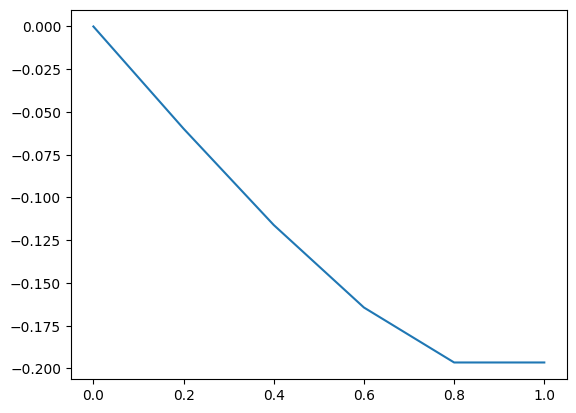

In [ ]:
import numpy as np

def p(x):
  return -3*x

def q(x):
  return 1


def r(x):
  return x


def mdf_Robin(x_inicial, x_final,h, y_x_inicial, y_x_final, lado = 1):
  N = int((x_final - x_inicial)/h ) - 1
  x = x_inicial + h
  fim_x  = x_final - h
  matriz = np.zeros((N, N))
  b = []

  i = 0
  while x != x_final:

      if(i==0 and lado ==0):
        resultado = 2*(h**2)*r(x) - (2-h*p(x))*(y_x_inicial*h)
      elif (i == N-1 and lado == 1):
        resultado = 2*(h**2)*r(x) - (2+h*p(x))*(y_x_final*h)
      elif(i==0 and lado == 1):
        resultado = 2*(h**2)*r(x) - (2-h*p(x))*(y_x_inicial)
      elif (i == N-1 and lado == 0):
        resultado = 2*(h**2)*r(x) - (2+h*p(x))*(y_x_final)
      else:
        resultado = 2*(h**2)*r(x)



      if (lado == 0 and i==0):
        matriz[i][i] = -2  - h*p(x) + 2*(h**2)*q(x)
      elif (lado == 1 and i==N-1):
        matriz[i][i] = -2  + h*p(x) + 2*(h**2)*q(x)
      else:
        matriz[i][i] = -4 + 2*(h**2)*q(x)



      if i != 0:
        matriz[i][i-1] = 2-h*p(x)

      if i != N-1:
        matriz[i][i+1] = 2+h*p(x)

      b.append(resultado)

      i+=1
      x+=h


  for i in range(N):
    print(matriz[i], b[i], sep="   =   ")

  resultado_final = thomas_matriz_completa(matriz, b)

  lista_y = []
  lista_x = []

  lista_x.append(x_inicial)

  if lado == 1:
    lista_y.append(y_x_inicial)
  else:
    t = resultado_final[0] - (y_x_inicial*h)
    lista_y.append(t)

  for i in range(len(resultado_final)):
    lista_x.append(x_inicial + h*(i+1))
    lista_y.append(resultado_final[i])

  lista_x.append(x_final)

  if lado == 0:
    lista_y.append(y_x_final)
  else:
    t = resultado_final[-1] + (y_x_final*h)
    lista_y.append(t)

  df = pd.DataFrame({'x': lista_x, 'y': lista_y})
  display(df)


  plt.plot(lista_x, lista_y)
  plt.show()


mdf_Robin(0, 1, 0.2, 0, 0,1)

## Newman

[-2.375  2.5    0.   ]   =   0.03125
[ 1.5   -3.875  2.5  ]   =   0.0625
[ 0.     1.5   -1.375]   =   0.71875


,x,y
0,0.00,3.377601
1,0.25,3.377601
2,0.50,3.221221
3,0.75,2.991331
4,1.00,2.741331


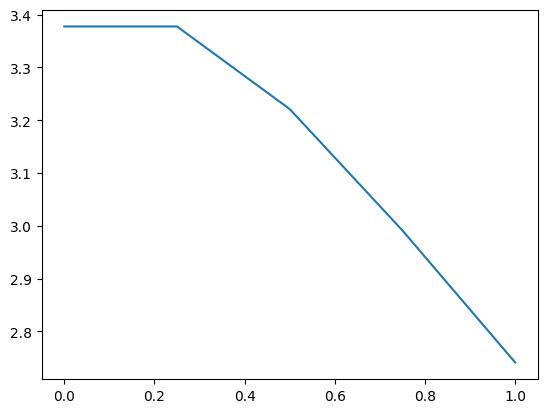

In [ ]:
import numpy as np

def p(x):
  return 2

def q(x):
  return 1


def r(x):
  return x


def mdf_newman(x_inicial, x_final,h, y_x_inicial, y_x_final):
  N = int((x_final - x_inicial)/h ) - 1
  x = x_inicial + h
  fim_x  = x_final - h
  matriz = np.zeros((N, N))
  b = []

  i = 0
  while x != x_final:

      if(i==0):
        resultado = 2*(h**2)*r(x) - (2-h*p(x))*(y_x_inicial*h)
      elif (i == N-1):
        resultado = 2*(h**2)*r(x) - (2+h*p(x))*(y_x_final*h)
      else:
        resultado = 2*(h**2)*r(x)



      if (i==0):
        matriz[i][i] = -2  - h*p(x) + 2*(h**2)*q(x)
      elif (i==N-1):
        matriz[i][i] = -2  + h*p(x) + 2*(h**2)*q(x)
      else:
        matriz[i][i] = -4 + 2*(h**2)*q(x)



      if i != 0:
        matriz[i][i-1] = 2-h*p(x)

      if i != N-1:
        matriz[i][i+1] = 2+h*p(x)

      b.append(resultado)

      i+=1
      x+=h


  for i in range(N):
    print(matriz[i], b[i], sep="   =   ")

  resultado_final = thomas_matriz_completa(matriz, b)

  lista_y = []
  lista_x = []

  lista_x.append(x_inicial)

  lista_y.append(resultado_final[0] - (y_x_inicial*h))

  for i in range(len(resultado_final)):
    lista_x.append(x_inicial + h*(i+1))
    lista_y.append(resultado_final[i])

  lista_x.append(x_final)
  lista_y.append(resultado_final[-1] + (y_x_final*h) )


  df = pd.DataFrame({'x': lista_x, 'y': lista_y})
  display(df)

  plt.plot(lista_x, lista_y)
  plt.show()


mdf_newman(0, 1, 0.25, 0, -1)